In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import numpy as np

In [2]:
tf.__version__

'2.10.0'

# Classification

In [3]:
fmnist_data = keras.datasets.fashion_mnist

In [4]:
(x_train, y_train), (x_test, y_test) = fmnist_data.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
# Get unique values in y_train
unique_y_train = np.unique(y_train)

# Print the unique values
print("Unique values in y_train:", unique_y_train)

Unique values in y_train: [0 1 2 3 4 5 6 7 8 9]


In [ ]:
x_train[1,]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

In [ ]:
plt.imshow(x_train[1,],cmap='gray')

In [ ]:
x_train, x_test = x_train/255.0, x_test/255.0

In [ ]:
x_train[1,]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.16078431, 0.7372549 , 0.40392157, 0.21176471, 0.18823529,
        0.16862745, 0.34117647, 0.65882353, 0.52156863, 0.0627451 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.19215686, 0.53333333, 0.85882353,
        0.84705882, 0.89411765, 0.9254902 , 1.        , 1.        ,
        1.        , 1.        , 0.85098039, 0.84313725, 0.99607843,
        0.90588235, 0.62745098, 0.17647059, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05490196, 0.69019608, 0.87058824, 0.87843137, 0.83137255,
        0.79607843, 0.77647059, 0.76862745, 0.78431373, 0.84313725,
        0.8       , 0.7921

## 1_define model

روش اول برای ساخت 

model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(75,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))
#optional activaion
#model.add(keras.layers.Dense(100,activation=tf.keras.activations.relu(x,alpha=0.0,max_value=none,threshold=0))

روش دوم برای ساخت مدل

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(75, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 75)                7575      
                                                                 
 dense_2 (Dense)             (None, 10)                760       
                                                                 
Total params: 86,835
Trainable params: 86,835
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers

In [ ]:
model.layers[1].get_weights()

[array([[-0.01962371,  0.05625762,  0.04198018, ...,  0.03368723,
          0.01343087, -0.06543858],
        [-0.04336953,  0.06202187, -0.00907692, ..., -0.02212277,
         -0.02054434,  0.03839558],
        [-0.07171957, -0.06242248, -0.00268222, ...,  0.07739228,
          0.05783027, -0.0031027 ],
        ...,
        [ 0.04347746,  0.036929  , -0.01889244, ..., -0.01008134,
          0.00274053,  0.05355206],
        [ 0.04350188,  0.05207558, -0.05885853, ...,  0.06792651,
         -0.07793733, -0.03046136],
        [ 0.04690319, -0.0789138 ,  0.05478247, ..., -0.07877748,
          0.03233772,  0.0249941 ]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [ ]:
weights_1, bias_1 =model.layers[1].get_weights()


In [ ]:
weights_1.shape

(784, 100)

In [ ]:
weights_1

array([[-0.01962371,  0.05625762,  0.04198018, ...,  0.03368723,
         0.01343087, -0.06543858],
       [-0.04336953,  0.06202187, -0.00907692, ..., -0.02212277,
        -0.02054434,  0.03839558],
       [-0.07171957, -0.06242248, -0.00268222, ...,  0.07739228,
         0.05783027, -0.0031027 ],
       ...,
       [ 0.04347746,  0.036929  , -0.01889244, ..., -0.01008134,
         0.00274053,  0.05355206],
       [ 0.04350188,  0.05207558, -0.05885853, ...,  0.06792651,
        -0.07793733, -0.03046136],
       [ 0.04690319, -0.0789138 ,  0.05478247, ..., -0.07877748,
         0.03233772,  0.0249941 ]], dtype=float32)

In [ ]:
bias_1

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

## 2_complie model

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
## 3_fit model

In [ ]:
history = model.fit(x=x_train, y=y_train, epochs=50, validation_split=0.15)

Epoch 1/50
1594/1594 [==============================] - 4s 2ms/step - loss: 0.7728 - accuracy: 0.7414 - val_loss: 0.5465 - val_accuracy: 0.8093
Epoch 2/50
1594/1594 [==============================] - 2s 2ms/step - loss: 0.5110 - accuracy: 0.8220 - val_loss: 0.5104 - val_accuracy: 0.8189
Epoch 3/50
1594/1594 [==============================] - 3s 2ms/step - loss: 0.4645 - accuracy: 0.8372 - val_loss: 0.4575 - val_accuracy: 0.8388
Epoch 4/50
1594/1594 [==============================] - 3s 2ms/step - loss: 0.4376 - accuracy: 0.8471 - val_loss: 0.4475 - val_accuracy: 0.8442
Epoch 5/50
1594/1594 [==============================] - 3s 2ms/step - loss: 0.4168 - accuracy: 0.8551 - val_loss: 0.4209 - val_accuracy: 0.8476
Epoch 6/50
1594/1594 [==============================] - 3s 2ms/step - loss: 0.3997 - accuracy: 0.8610 - val_loss: 0.4006 - val_accuracy: 0.8596
Epoch 7/50
1594/1594 [==============================] - 3s 2ms/step - loss: 0.3851 - accuracy: 0.8657 - val_loss: 0.4071 - val_accuracy:

In [ ]:
print(history.history)

{'loss': [0.7728016376495361, 0.5109650492668152, 0.4645017683506012, 0.43755438923835754, 0.4168003499507904, 0.3997105062007904, 0.38509106636047363, 0.3740222752094269, 0.36329415440559387, 0.3536372184753418, 0.345396488904953, 0.3385854661464691, 0.33122777938842773, 0.32392117381095886, 0.3186625838279724, 0.3136906325817108, 0.30650007724761963, 0.30224376916885376, 0.29766130447387695, 0.29317188262939453, 0.2886143624782562, 0.28419893980026245, 0.2815153896808624, 0.27613288164138794, 0.2730894684791565, 0.26899197697639465, 0.2657127380371094, 0.2613264322280884, 0.25958016514778137, 0.2547488808631897, 0.25345999002456665, 0.24977639317512512, 0.24661463499069214, 0.24462109804153442, 0.24095048010349274, 0.23805458843708038, 0.2353743314743042, 0.23306596279144287, 0.23022539913654327, 0.22753430902957916, 0.22580751776695251, 0.2228875756263733, 0.22023232281208038, 0.21879933774471283, 0.2162719964981079, 0.21309968829154968, 0.21129129827022552, 0.2079300582408905, 0.20

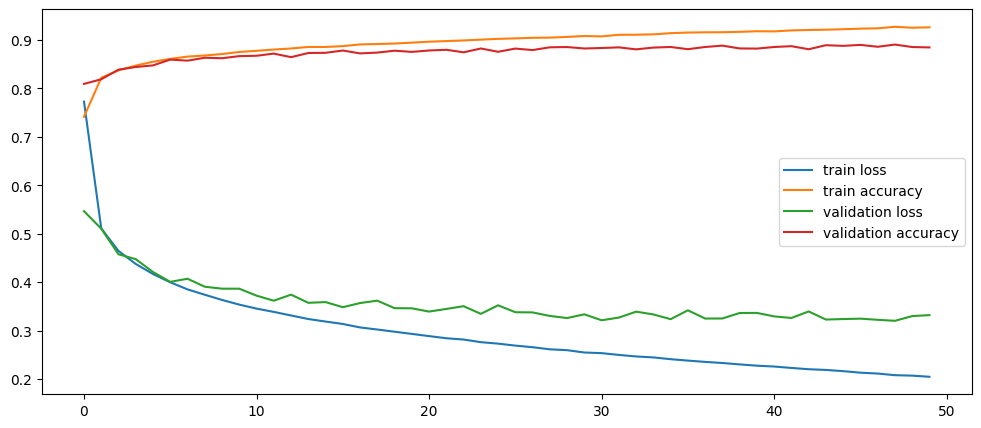

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history.history["loss"], label="train loss")
ax.plot(history.history["accuracy"], label="train accuracy")
ax.plot(history.history["val_loss"], label="validation loss")
ax.plot(history.history["val_accuracy"], label="validation accuracy")
ax.legend()

In [ ]:
model.evaluate(x_test,y_test,verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.3555 - accuracy: 0.8761


[0.35545048117637634, 0.8761000037193298]

In [ ]:
x3=x_test[1:4,:,:]


In [ ]:
x3.shape


(3, 28, 28)

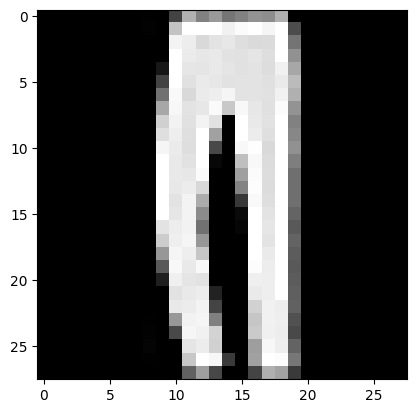

In [ ]:
plt.imshow(x3[1,:,:],cmap='gray')

In [ ]:
model.predict(x3)

Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x000001B72A38CF70>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x000001B72A38CF70>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Orig

array([[1.9318533e-05, 4.1178822e-08, 9.9150544e-01, 1.8195678e-08,
        8.3931647e-03, 1.2545809e-15, 8.1949460e-05, 2.1103780e-11,
        4.8822102e-09, 3.6068571e-13],
       [5.4506688e-07, 9.9999928e-01, 4.4569952e-09, 8.6418162e-09,
        8.7879442e-08, 1.8487332e-16, 4.5844348e-10, 1.7420485e-13,
        7.4878287e-10, 3.1823690e-16],
       [6.2939839e-06, 9.9995768e-01, 3.0675951e-06, 1.5768903e-05,
        1.7074057e-05, 4.9772903e-13, 1.3521407e-07, 7.2290096e-10,
        8.7452374e-09, 4.1065457e-11]], dtype=float32)

In [ ]:
model.predict(x3).round(3)

1/1 [==============================] - 0s 21ms/step


array([[0.   , 0.   , 0.992, 0.   , 0.008, 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

چون 10 تا لیبل داریم شیپ 10 است

In [ ]:
model.predict(x3).shape

1/1 [==============================] - 0s 18ms/step


(3, 10)

In [ ]:
np.argmax(model.predict(x3).round(3), axis=1)

1/1 [==============================] - 0s 19ms/step


array([2, 1, 1], dtype=int64)

In [ ]:
y_test[1:4]

array([2, 1, 1], dtype=uint8)